# Classical feedforward and control flow

In [1]:
import numpy as np
from qiskit import ClassicalRegister, QuantumRegister, QuantumCircuit,  assemble, Aer, BasicAer,transpile, execute 
from qiskit.tools.visualization import circuit_drawer, plot_histogram, plot_bloch_multivector
from qiskit.quantum_info import Statevector
from numpy import sqrt, pi
from qiskit.circuit import ParameterVector

C:\Users\ASUS\AppData\Local\Temp\ipykernel_6844\980693105.py:2: DeprecationWarning: BasicAer is deprecated since Qiskit 0.46 and will be removed in Qiskit 1.0. The BasicAer (qiskit.providers.basicaer) module has been superseded by  qiskit.providers.basic_provider, and all its classes have been renamed to follow a new naming convention. More information and migration guidelines can be found in the 0.46 API docs for BasicAer.
  from qiskit import ClassicalRegister, QuantumRegister, QuantumCircuit,  assemble, Aer, BasicAer,transpile, execute


### If statement
- Pernyataan if digunakan untuk melakukan operasi secara kondisional berdasarkan nilai bit atau register klasik.
- Pada contoh di bawah, kami menerapkan gerbang Hadamard ke qubit dan mengukurnya. Jika hasilnya 1, maka kita menerapkan gerbang X pada qubit, yang memiliki efek mengembalikannya ke keadaan 0. Kami kemudian mengukur qubit lagi. Hasil pengukuran yang dihasilkan harusnya 0 dengan probabilitas 100%.

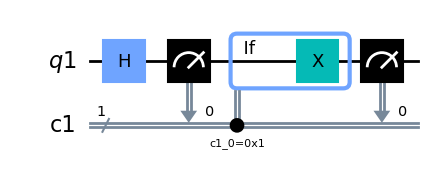

In [5]:
from qiskit.circuit import QuantumCircuit, QuantumRegister, ClassicalRegister
 
qubits = QuantumRegister(1)
clbits = ClassicalRegister(1)
qc = QuantumCircuit(qubits, clbits)
(q0,) = qubits
(c0,) = clbits
 
qc.h(q0)
qc.measure(q0, c0)
with qc.if_test((c0, 1)):
    qc.x(q0)
qc.measure(q0, c0)
qc.draw("mpl")

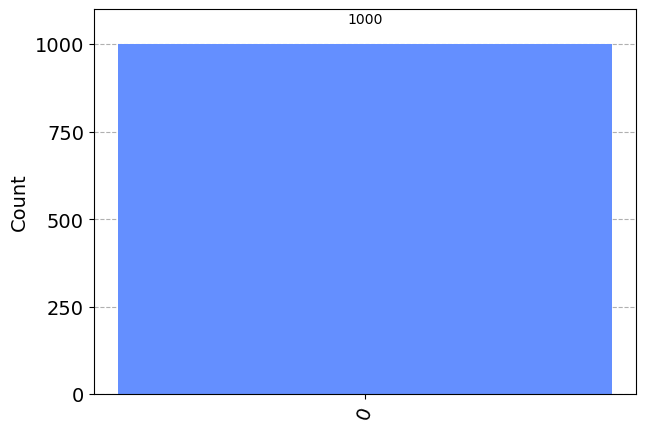

In [8]:
backend = Aer.get_backend("aer_simulator")
tqc = transpile(qc, backend)
job = backend.run(tqc, shots=1000)
result = job.result()
counts = result.get_counts(tqc)
plot_histogram(counts)

## with statement
- Pernyataan with dapat diberikan target penugasan yang merupakan manajer konteks yang dapat disimpan dan selanjutnya digunakan untuk membuat blok else, yang dieksekusi setiap kali isi blok if tidak dieksekusi.

- Pada contoh di bawah, kami menginisialisasi register dengan dua qubit dan dua bit klasik. Kami menerapkan gerbang Hadamard ke qubit pertama dan mengukurnya. Jika hasilnya 1, maka kita terapkan gerbang Hadamard pada qubit kedua; jika tidak, kami menerapkan gerbang X pada qubit kedua. Terakhir, kami juga mengukur qubit kedua.

C:\Users\ASUS\anaconda3\Lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


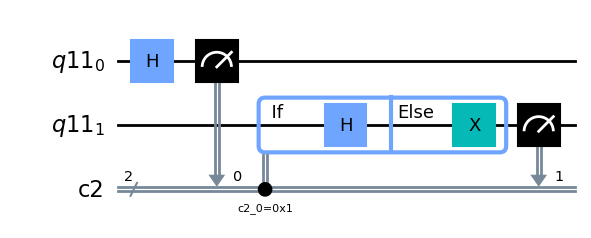

In [9]:
qubits = QuantumRegister(2)
clbits = ClassicalRegister(2)
qc = QuantumCircuit(qubits, clbits)
(q0, q1) = qubits
(c0, c1) = clbits
 
qc.h(q0)
qc.measure(q0, c0)
with qc.if_test((c0, 1)) as else_:
    qc.h(q1)
with else_:
    qc.x(q1)
qc.measure(q1, c1)
 
qc.draw("mpl")

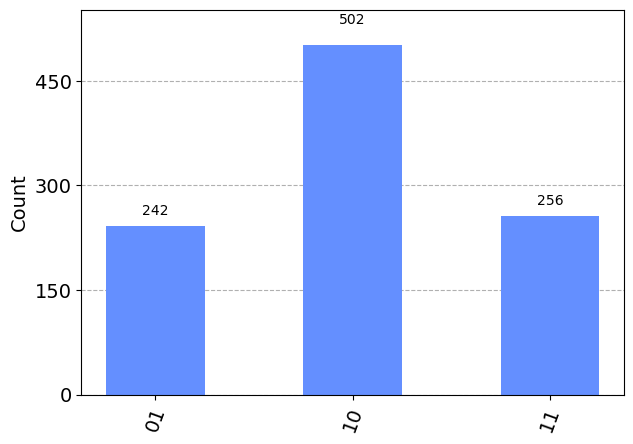

In [10]:
backend = Aer.get_backend("aer_simulator")
tqc = transpile(qc, backend)
job = backend.run(tqc, shots=1000)
result = job.result()
counts = result.get_counts(tqc)
plot_histogram(counts)

- Selain pengkondisian pada satu bit klasik, dimungkinkan juga untuk mengkondisikan nilai register klasik yang terdiri dari beberapa bit.

Pada contoh di bawah, kami menerapkan gerbang Hadamard ke dua qubit dan mengukurnya. Jika hasilnya 01, yaitu qubit pertama 1 dan qubit kedua 0, maka kita terapkan gerbang X pada qubit ketiga. Terakhir, kami mengukur qubit ketiga. Perhatikan bahwa untuk kejelasan, kami memilih untuk menentukan status bit klasik ketiga, yaitu 0, dalam kondisi if. Pada gambar rangkaian, kondisi ditunjukkan dengan lingkaran pada bit klasik yang dikondisikan. Lingkaran hitam menunjukkan pengkondisian pada 1, sedangkan lingkaran putih menunjukkan pengkondisian pada 0.

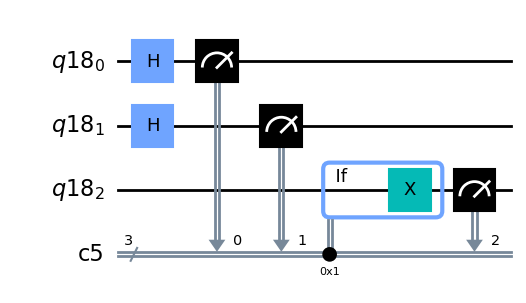

In [14]:
qubits = QuantumRegister(3)
clbits = ClassicalRegister(3)
qc     = QuantumCircuit(qubits, clbits)
(q0, q1, q2) = qubits
(c0, c1, c2) = clbits 
 
qc.h([q0, q1])
qc.measure(q0, c0)
qc.measure(q1, c1)
with qc.if_test((clbits, 0b001)):  # 0b = biner, 001 = 3 bit,  01 (2 bit) menyesuaikan 2-qubit yang diukur 
    qc.x(q2)
qc.measure(q2, c2)

qc.draw("mpl")

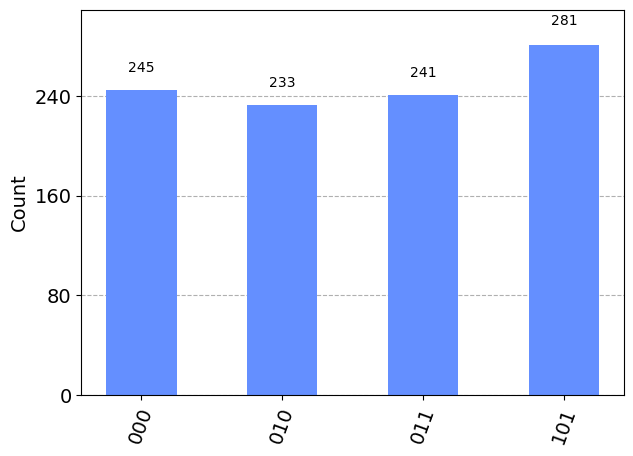

In [15]:
backend = Aer.get_backend("aer_simulator")
tqc = transpile(qc, backend)
job = backend.run(tqc, shots=1000)
result = job.result()
counts = result.get_counts(tqc)
plot_histogram(counts)

## Switch statement
- Pernyataan switch digunakan untuk memilih tindakan berdasarkan nilai bit atau register klasik. Ini mirip dengan pernyataan if, tetapi memungkinkan seseorang untuk menentukan lebih banyak kasus untuk logika percabangan. Pada contoh di bawah, kami menerapkan gerbang Hadamard ke qubit dan mengukurnya. Jika hasilnya 0, kita terapkan gerbang X pada qubit, dan jika hasilnya 1, kita terapkan gerbang Z. Hasil pengukuran yang dihasilkan haruslah 1 dengan probabilitas 100%.

C:\Users\ASUS\anaconda3\Lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


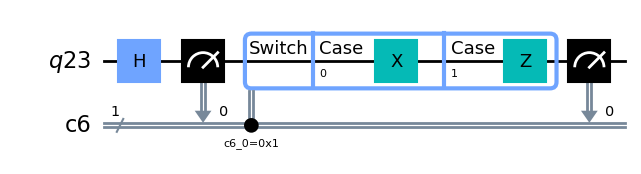

In [16]:
qubits = QuantumRegister(1)
clbits = ClassicalRegister(1)
qc = QuantumCircuit(qubits, clbits)
(q0,) = qubits
(c0,) = clbits
 
qc.h(q0)
qc.measure(q0, c0)
with qc.switch(c0) as case:
    with case(0):
        qc.x(q0)
    with case(1):
        qc.z(q0)
qc.measure(q0, c0)
 
qc.draw("mpl")

- Karena contoh di atas menggunakan satu bit klasik, hanya ada dua kemungkinan kasus, jadi kita bisa mendapatkan hasil yang sama dengan menggunakan pernyataan if-else. Switch case terutama berguna ketika melakukan percabangan pada nilai register klasik yang terdiri dari beberapa bit, seperti yang ditunjukkan dalam contoh berikut. Di sini, kami juga menunjukkan cara membuat kasus default, yang dijalankan jika tidak ada kasus sebelumnya. Perhatikan bahwa dalam pernyataan switch, hanya satu blok yang dieksekusi. Tidak ada kesalahan.

Pada contoh di bawah, kami menerapkan gerbang Hadamard ke dua qubit dan mengukurnya. Jika hasilnya 00 atau 11, kita menerapkan gerbang Z ke qubit ketiga. Jika hasilnya 01, kita terapkan gerbang Y. Jika tidak ada kasus sebelumnya yang cocok, kita menerapkan gerbang X. Terakhir, ukur qubit ketiga.

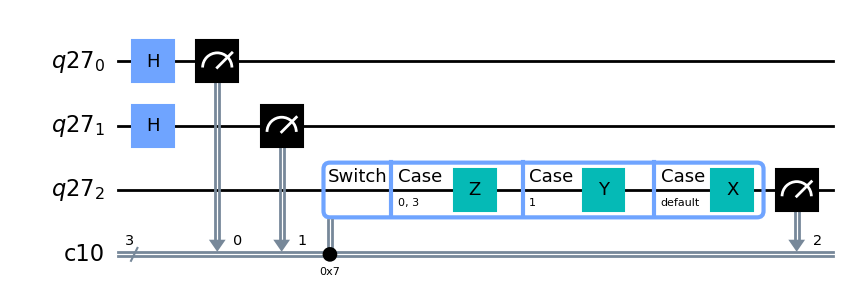

In [20]:
qubits = QuantumRegister(3)
clbits = ClassicalRegister(3)
qc = QuantumCircuit(qubits, clbits)
(q0, q1, q2) = qubits
(c0, c1, c2) = clbits
 
qc.h([q0, q1])
qc.measure(q0, c0)
qc.measure(q1, c1)
with qc.switch(clbits) as case:
    with case(0b000, 0b011):    # 0b = biner, 000 = 3 bit, 011 = 3 bit,  00 atau 11 , 2-qubit yang diukur
        qc.z(q2)
    with case(0b001):           # 0b = biner, 001 = 3 bit, 01 disesuaikan jumlah qubit yang diukur 2
        qc.y(q2)
    with case(case.DEFAULT):
        qc.x(q2)
qc.measure(q2, c2)
 
qc.draw("mpl")

## For loop
- Perulangan for digunakan untuk melakukan iterasi pada rangkaian nilai klasik dan melakukan beberapa operasi selama setiap iterasi.

Pada contoh di bawah, kita menggunakan perulangan for untuk menerapkan 5 gerbang X ke qubit dan kemudian mengukurnya. Karena kita menjalankan gerbang X dalam jumlah ganjil, efek keseluruhannya adalah membalik qubit dari keadaan 0 ke keadaan 1.


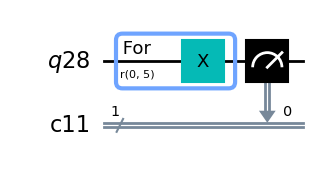

In [21]:
qubits = QuantumRegister(1)
clbits = ClassicalRegister(1)
qc = QuantumCircuit(qubits, clbits)
(q0,) = qubits
(c0,) = clbits
 
with qc.for_loop(range(5)) as _:
    qc.x(q0)
qc.measure(q0, c0)
 
qc.draw("mpl")

## While loop
- Perulangan while digunakan untuk mengulang instruksi ketika kondisi tertentu terpenuhi.

Pada contoh di bawah, kami menerapkan gerbang Hadamard ke dua qubit dan mengukurnya. Kemudian, kita membuat perulangan while yang mengulangi prosedur ini ketika hasil pengukurannya adalah 11. Hasilnya, pengukuran akhir tidak boleh sama dengan 11, dengan kemungkinan yang tersisa muncul dengan frekuensi yang kira-kira sama.

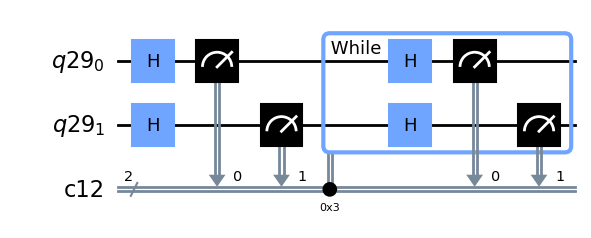

In [22]:
qubits = QuantumRegister(2)
clbits = ClassicalRegister(2)
qc = QuantumCircuit(qubits, clbits)
 
q0, q1 = qubits
c0, c1 = clbits
 
qc.h([q0, q1])
qc.measure(q0, c0)
qc.measure(q1, c1)
with qc.while_loop((clbits, 0b11)): # 0b = biner, 11 = 2 bit disesuaikan julah qubit
    qc.h([q0, q1])
    qc.measure(q0, c0)
    qc.measure(q1, c1)
 
qc.draw("mpl")